In [26]:
# importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import class_weight
from imblearn.pipeline import Pipeline

## Project Overview

**A Journey into Fraudulent Card Detection**

Fraudulent card activities pose a significant threat to individuals and financial institutions alike. Detecting and preventing such activities is crucial to safeguarding financial transactions and maintaining trust in the banking system. In this case study, we dive into a dataset of fraudulent card transactions to uncover insights, patterns, and indicators that can help strengthen fraud detection systems.

**Data Description**

The dataset comprises transactions with a diverse set of features such as distance from home, distance from last transaction, ratio to median purchase price, repeat retailer, chip, pin number, order type. However, it's important to note that the dataset is imbalanced, with a small percentage of transactions labelled as fraudulent. Despite this challenge, we embark on our analysis to shed light on the world of fraudulent card activities.

**Data Source**

This dataset is sourced from:https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud

In [3]:
# To read the data and create dataframe
df = pd.read_csv('C:/Users/olalekan.fo/Downloads/card_transdata.csv')

# Data Preparation

**Column Visualization**

In [4]:
# First few lines of the data
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


**Data Quality Check**

In [5]:
# Check data types and missing values
print(df.info())

# Check for duplicates
print(df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  int64  
 4   used_chip                       1000000 non-null  int64  
 5   used_pin_number                 1000000 non-null  int64  
 6   online_order                    1000000 non-null  int64  
 7   fraud                           1000000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 61.0 MB
None
0


**Negative Values Check**

In [6]:
# Specify the columns to check for negative values
columns_to_check = [
    'distance_from_home',
    'distance_from_last_transaction',
    'ratio_to_median_purchase_price',
    'repeat_retailer',
    'used_chip',
    'used_pin_number',
    'online_order',
    'fraud'
]

# Check for negative values in the specified columns
negative_values = df[(df[columns_to_check] < 0).any(axis=1)]

# Print the rows with negative values
print(negative_values)

Empty DataFrame
Columns: [distance_from_home, distance_from_last_transaction, ratio_to_median_purchase_price, repeat_retailer, used_chip, used_pin_number, online_order, fraud]
Index: []


**Data Quality Check**

In [7]:
# Describe the data in each column
column_descriptions = df.describe()

# Print the column descriptions
print(column_descriptions)

       distance_from_home  distance_from_last_transaction  \
count      1000000.000000                  1000000.000000   
mean            26.628792                        5.036519   
std             65.390784                       25.843093   
min              0.004874                        0.000118   
25%              3.878008                        0.296671   
50%              9.967760                        0.998650   
75%             25.743985                        3.355748   
max          10632.723670                    11851.104560   

       ratio_to_median_purchase_price  repeat_retailer       used_chip  \
count                  1000000.000000   1000000.000000  1000000.000000   
mean                         1.824182         0.881536        0.350399   
std                          2.799589         0.323157        0.477095   
min                          0.004399         0.000000        0.000000   
25%                          0.475673         1.000000        0.000000   
50%   

**Check for Dupliactes**

In [8]:
# To Check for duplicates/uniqueness
df.duplicated().sum()

0

**Check for Uniqueness**

In [9]:
# To check for unique values
# List of columns to check for unique values
columns_to_check = [
    'distance_from_home',
    'distance_from_last_transaction',
    'ratio_to_median_purchase_price',
    'repeat_retailer',
    'used_chip',
    'used_pin_number',
    'online_order',
    'fraud'
]

# Loop through each column and print unique values
for column in columns_to_check:
    unique_values = df[column].unique()
    print(f"Unique values in {column}:")
    print(unique_values)
    print()

Unique values in distance_from_home:
[57.87785658 10.8299427   5.09107949 ...  2.91485699  4.25872939
 58.10812496]

Unique values in distance_from_last_transaction:
[0.31114001 0.1755915  0.8051526  ... 1.47268669 0.24202337 0.31811012]

Unique values in ratio_to_median_purchase_price:
[1.94593998 1.29421881 0.42771456 ... 0.21807549 0.47582206 0.38691985]

Unique values in repeat_retailer:
[1 0]

Unique values in used_chip:
[1 0]

Unique values in used_pin_number:
[0 1]

Unique values in online_order:
[0 1]

Unique values in fraud:
[0 1]



**Check for Outliers**

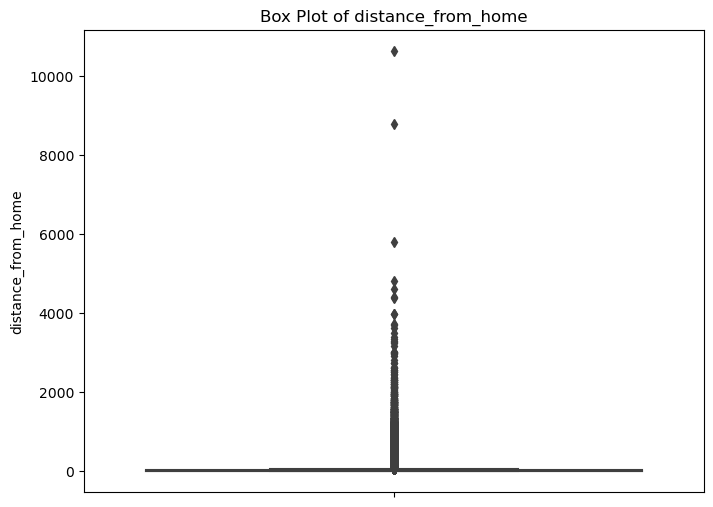

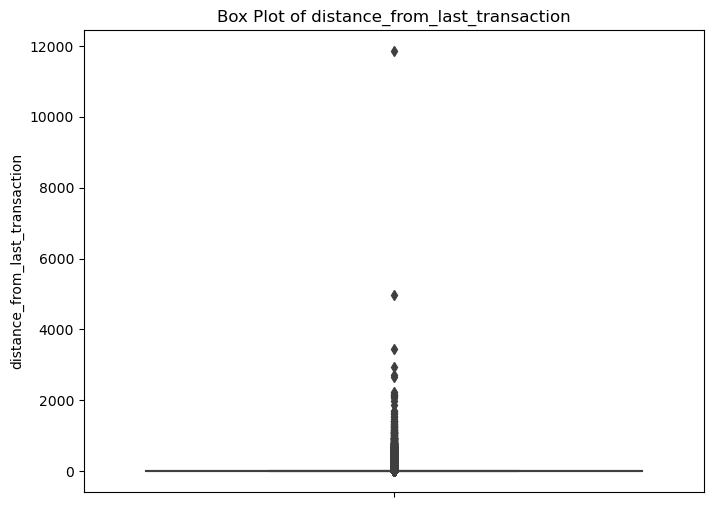

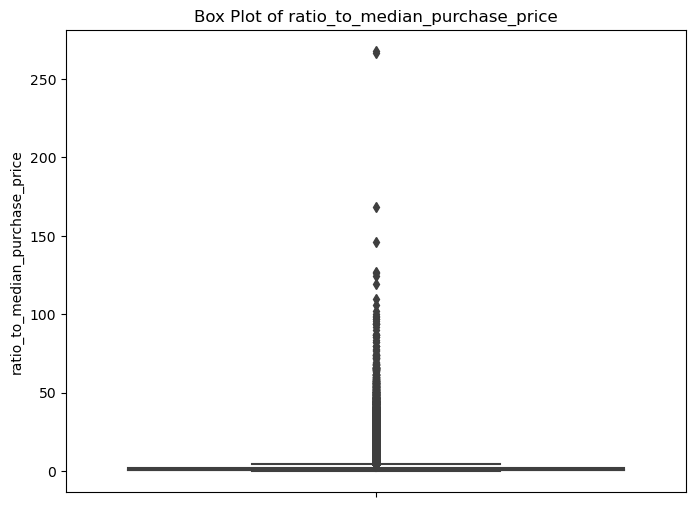

In [10]:
#Visualization Method
# Select the numerical variables to be analyzed
numerical_columns = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']

# Create box plots for each numerical variable
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

In [11]:
# Z-score method
# Select the columns to be analyzed
columns = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']

# Define an empty DataFrame to store the outliers
outliers = pd.DataFrame()

# Loop through each column
for column in columns:
    # Calculate the z-scores for each data point in the current column
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())

    # Define a threshold for identifying outliers (e.g., z-score > 3)
    threshold = 3

    # Identify outliers based on the threshold for the current column
    column_outliers = df[z_scores > threshold]

    # Append the outliers for the current column to the outliers DataFrame
    outliers = pd.concat([outliers, column_outliers])

    # Print the number of outliers in the current column
    num_outliers = len(column_outliers)
    print(f"Number of outliers in '{column}': {num_outliers}")

# Print the outliers
print("All Outliers:")
print(outliers)

Number of outliers in 'distance_from_home': 13324
Number of outliers in 'distance_from_last_transaction': 7099
Number of outliers in 'ratio_to_median_purchase_price': 17061
All Outliers:
        distance_from_home  distance_from_last_transaction  \
12              765.282559                        0.371562   
112             335.189320                        1.114168   
196             242.913187                        4.424776   
220             248.064049                        0.171596   
261             601.522919                        0.028723   
...                    ...                             ...   
999883           14.850909                        7.218322   
999902           70.272698                        0.307762   
999939           51.412900                        3.429330   
999949           15.724799                        1.875906   
999973           10.148074                        4.465290   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  

In [12]:
# Interquartile Method
# Select the columns to be analyzed
columns = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']

# Define an empty DataFrame to store the outliers
outliers = pd.DataFrame()

# Loop through each column
for column in columns:
    # Calculate the first quartile (25th percentile)
    Q1 = df[column].quantile(0.25)

    # Calculate the third quartile (75th percentile)
    Q3 = df[column].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the upper and lower bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers based on the bounds for the current column
    column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Append the outliers for the current column to the outliers DataFrame
    outliers = pd.concat([outliers, column_outliers])
    
    # Print the number of outliers in the current column
    num_outliers = len(column_outliers)
    print(f"Number of outliers in '{column}': {num_outliers}")

# Print the outliers
print("Outliers:")
print(outliers)

Number of outliers in 'distance_from_home': 103631
Number of outliers in 'distance_from_last_transaction': 124367
Number of outliers in 'ratio_to_median_purchase_price': 84386
Outliers:
        distance_from_home  distance_from_last_transaction  \
12              765.282559                        0.371562   
15              179.665148                        0.120920   
16              114.519789                        0.707003   
20               78.623242                        1.409245   
30               85.837253                        1.035118   
...                    ...                             ...   
999908           45.296658                        0.882736   
999939           51.412900                        3.429330   
999946            5.568394                        0.232751   
999949           15.724799                        1.875906   
999973           10.148074                        4.465290   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \

# Exploratory Data Analysis

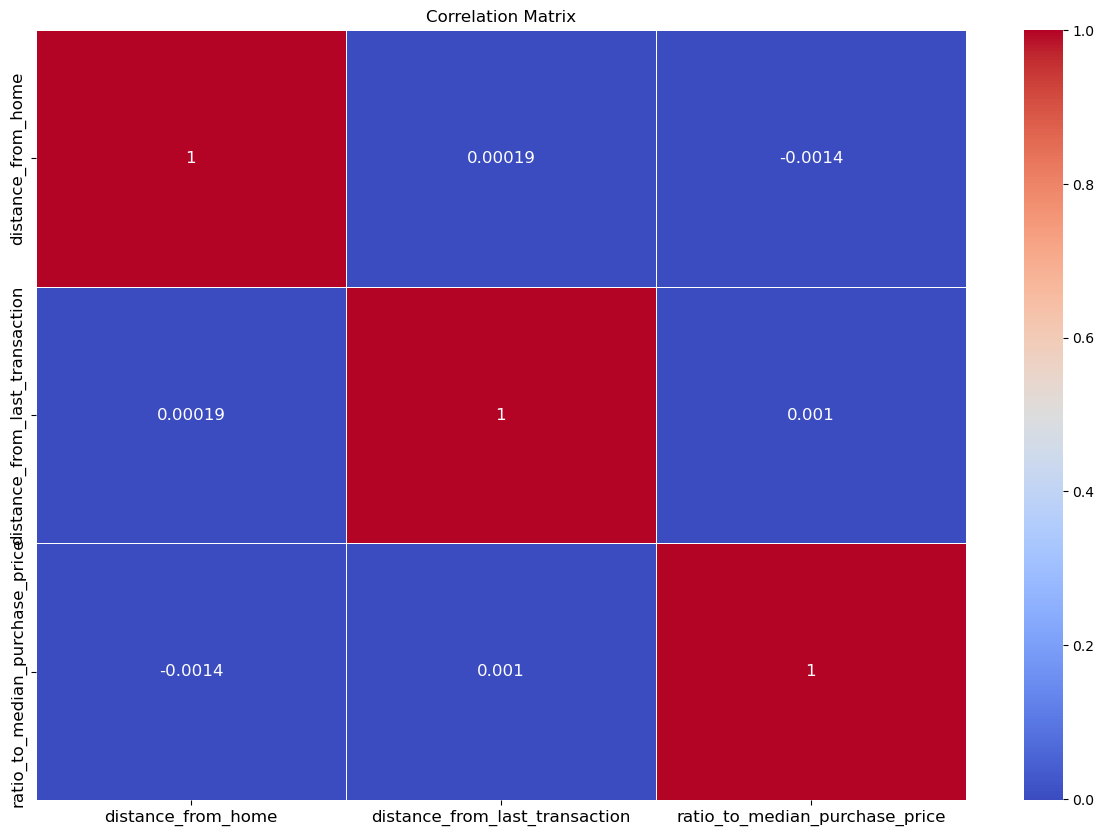

In [13]:
#creating a correlation matrix
# Select columns for the correlation matrix
columns = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']

# Create a DataFrame with the selected columns
selected_columns_df = df[columns]

# Compute the correlation matrix for the selected columns
correlation_matrix = selected_columns_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, linewidth=0.5, annot_kws={"size": 12})

# Adjust font size of axis labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add labels
plt.title('Correlation Matrix')
plt.show()

**Comments**

This suggests that there is little to no linear relationship between these variables. Changes in one variable do not consistently correspond to changes in the others.

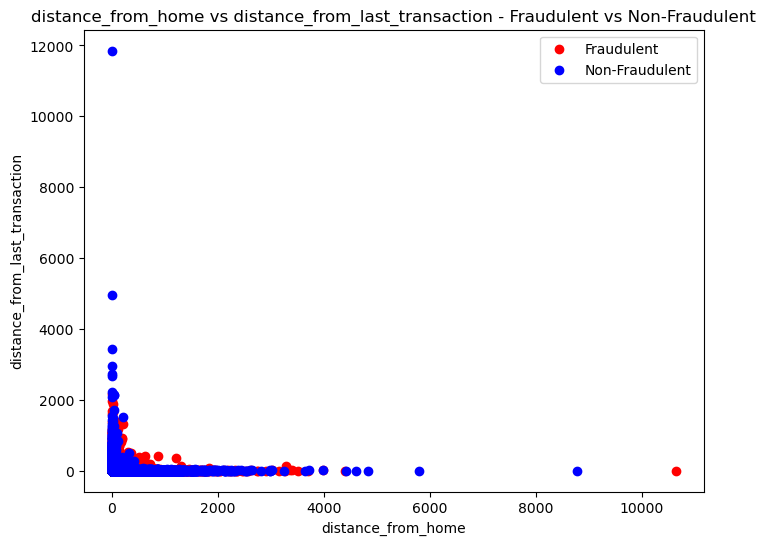

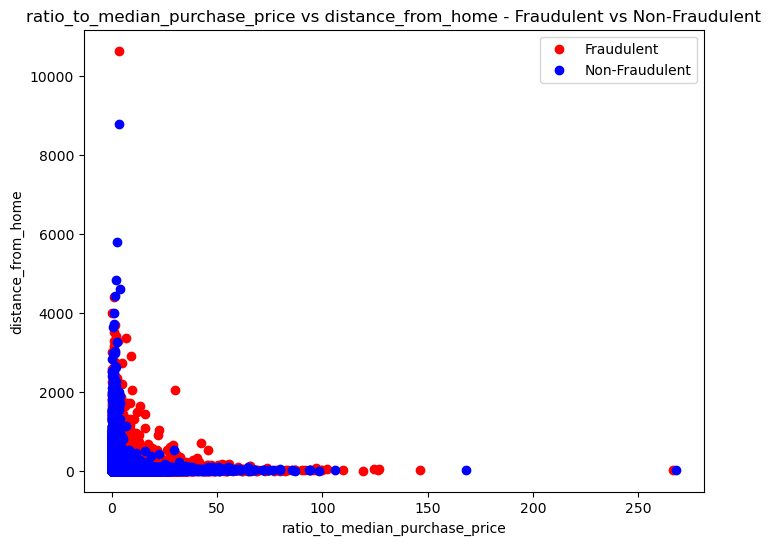

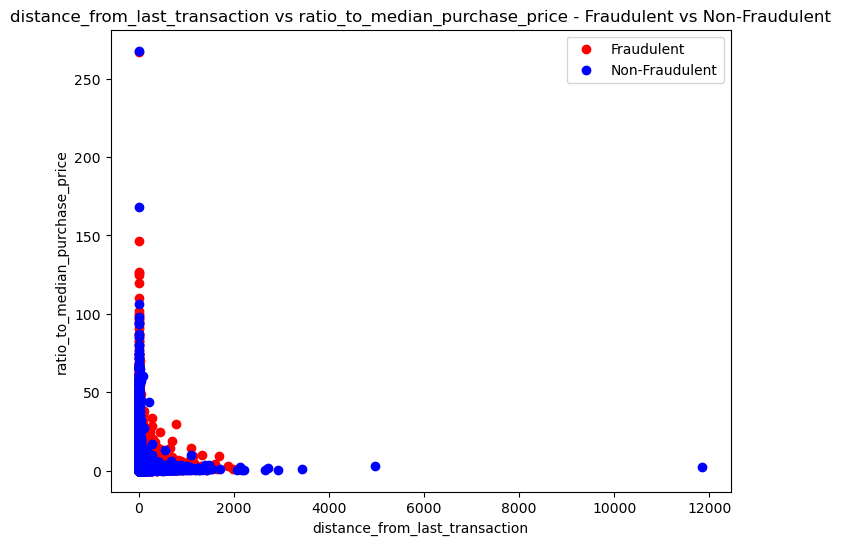

In [14]:
# A visualization of the correlation
# Select pairs of continuous features for scatter plots
feature_pairs = [('distance_from_home', 'distance_from_last_transaction'),
                 ('ratio_to_median_purchase_price', 'distance_from_home'),
                 ('distance_from_last_transaction', 'ratio_to_median_purchase_price')]

# Separate fraudulent and non-fraudulent transactions
fraudulent_df = df[df['fraud'] == 1]
non_fraudulent_df = df[df['fraud'] == 0]

# Create scatter plots for each feature pair
for feature_x, feature_y in feature_pairs:
    plt.figure(figsize=(8, 6))
    plt.scatter(fraudulent_df[feature_x], fraudulent_df[feature_y], color='red', label='Fraudulent')
    plt.scatter(non_fraudulent_df[feature_x], non_fraudulent_df[feature_y], color='blue', label='Non-Fraudulent')
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.legend()
    plt.title(f'{feature_x} vs {feature_y} - Fraudulent vs Non-Fraudulent')
    plt.show()

**Comments**

This visualises that there are no clear pattern or relationship between the 3 variables.

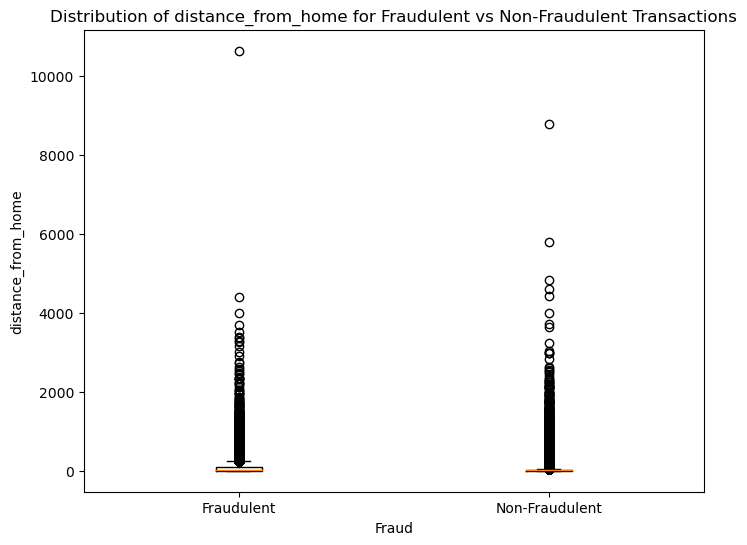

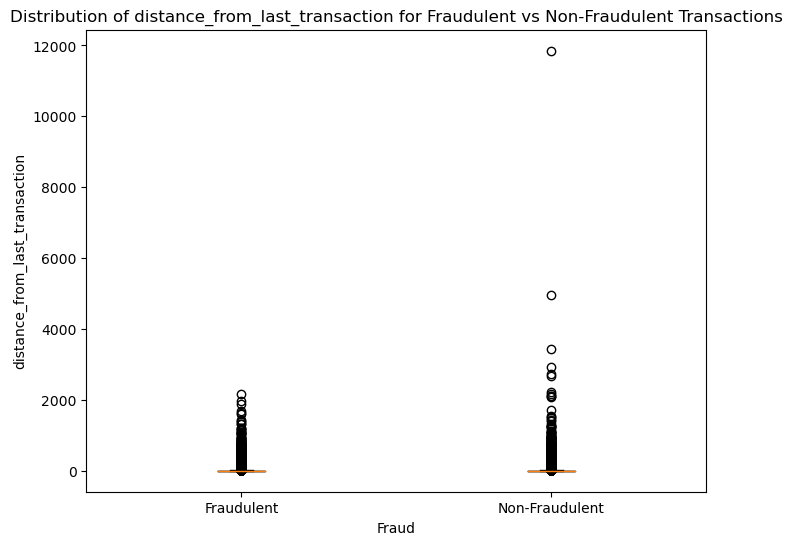

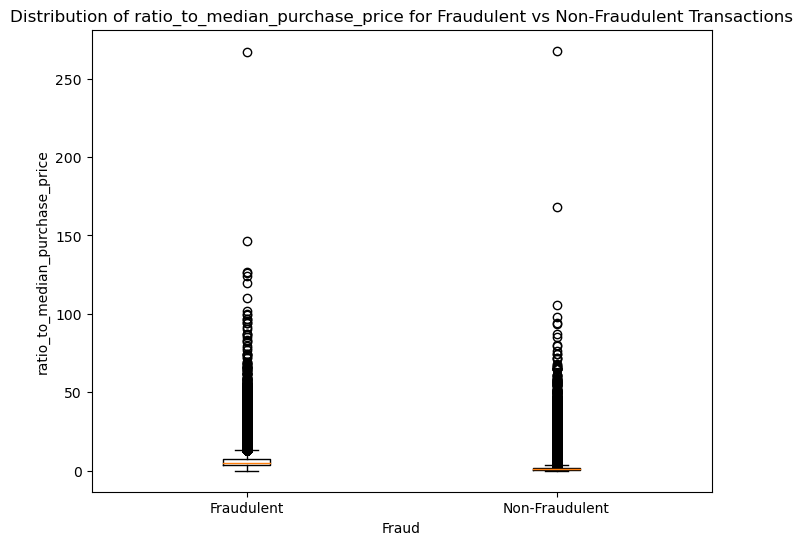

In [15]:
# Creating a box plot
# Select numerical features for box plots
numerical_features = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']

# Separate fraudulent and non-fraudulent transactions
fraudulent_df = df[df['fraud'] == 1]
non_fraudulent_df = df[df['fraud'] == 0]

# Create box plots for each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.boxplot([fraudulent_df[feature], non_fraudulent_df[feature]])
    plt.xticks([1, 2], ['Fraudulent', 'Non-Fraudulent'])
    plt.xlabel('Fraud')
    plt.ylabel(feature)
    plt.title(f'Distribution of {feature} for Fraudulent vs Non-Fraudulent Transactions')
    plt.show()

**Comments**

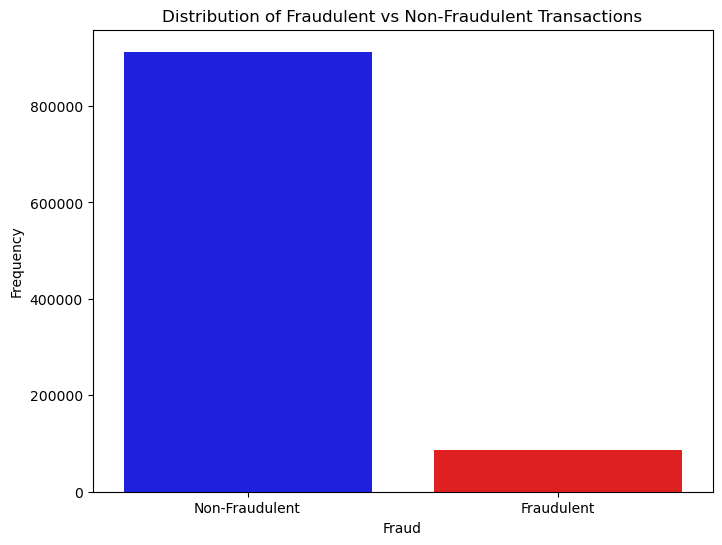

The percentage of fraudulent transactions in the dataset is: 8.74%


In [54]:
# Distribution of Fraudulent vs Non-Fraudulent Transactions
# Specify plot dimensions
plt.figure(figsize=(8, 6))

# Create a count plot to visualize the distribution of fraudulent and non-fraudulent transactions
ax = sns.countplot(x='fraud', data=df, palette=['blue', 'red'])
# Set the x-axis tick labels
ax.set_xticklabels(['Non-Fraudulent', 'Fraudulent'])

# Add labels and title to the plot
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Fraud')
plt.ylabel('Frequency')

# Show the plot
plt.show()

# Calculate the percentage of fraudulent transactions in the dataset
fraudulent_percentage = (df['fraud'].sum() / len(df)) * 100
print(f"The percentage of fraudulent transactions in the dataset is: {fraudulent_percentage:.2f}%")

**Comments**

The plot shows that the majority of transactions fall under the non-fraudulent category, while only a small portion belongs to the fraudulent class, comprising just 8.74% of the total. This substantial difference indicates a considerable class imbalance which needs to be handled.

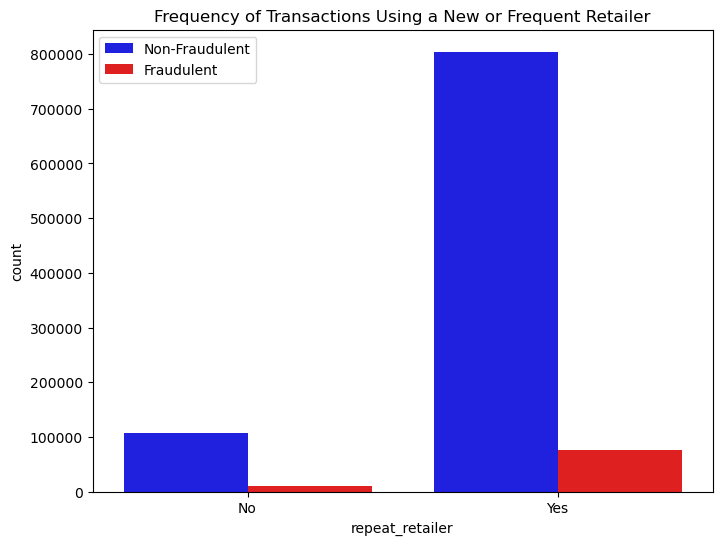

In [17]:
# Frequency of Transactions Using a New or Frequent Retailer

# Set the figure size for the plot
plt.figure(figsize=(8, 6))

# Create a count plot 
ax = sns.countplot(x='repeat_retailer', hue='fraud', data=df, palette=['blue', 'red'])

# Set the x-axis tick labels 
ax.set_xticklabels(['No', 'Yes'])

# Add a legend to the plot to label the colors as 'Non-Fraudulent' and 'Fraudulent'
ax.legend(labels=['Non-Fraudulent', 'Fraudulent'])

# Set the title of the plot
plt.title('Frequency of Transactions Using a New or Frequent Retailer')

# Show the plot
plt.show()

**Comments**

Fraudulent transactions primarily occur with repeat retailers, indicating exploitation of established relationships. Instances involving new retailers are relatively few, emphasizing the importance of robust security measures and vigilant monitoring to detect and prevent fraud.

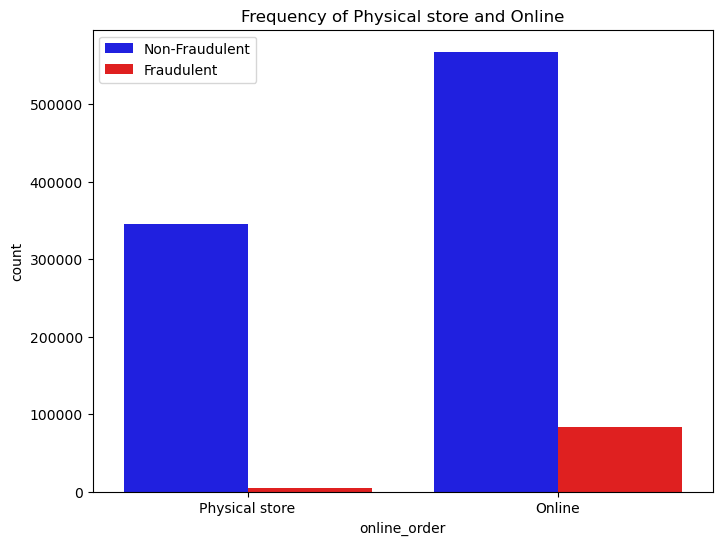

In [57]:
# Frequency of Physical store and Online
plt.figure(figsize=(8, 6))

# Creating a countplot to visualize the frequency of transactions
ax = sns.countplot(x='online_order', hue='fraud', data=df, palette=['blue', 'red'])

# Setting the tick labels
ax.set_xticklabels(['Physical store', 'Online'])

# Adding a legend to the plot with labels for non-fraudulent and fraudulent transactions
ax.legend(labels=['Non-Fraudulent', 'Fraudulent'])

# Setting the title of the plot
plt.title('Frequency of Physical store and Online')

# Displaying the plot
plt.show()

**Comments**

This reveals that credit card transactions conducted online have a higher likelihood of being fraudulent compared to transactions made in physical stores. 

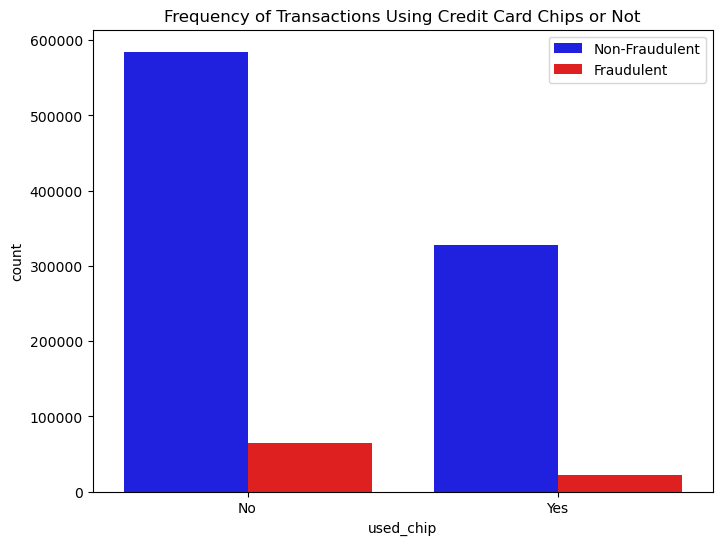

In [53]:
# Frequency of Transactions Using Credit Card Chips or Not
plt.figure(figsize=(8, 6))

# Creating a countplot to visualize the frequency of transactions
ax = sns.countplot(x='used_chip', hue='fraud', data=df, palette=['blue', 'red'])

# Setting the tick labels on the x-axis to 'No' and 'Yes'
ax.set_xticklabels(['No', 'Yes'])

# Adding a legend to the plot with labels for non-fraudulent and fraudulent transactions
ax.legend(labels=['Non-Fraudulent', 'Fraudulent'])

# Setting the title of the plot
plt.title('Frequency of Transactions Using Credit Card Chips or Not')

# Displaying the plot
plt.show()

**Comments**

The plot shows that a higher frequency of fraudulent transactions in the non-chip category than in the chip category. This suggests that utilizing a credit card chip provides a certain level of security and protection against fraudulent activities.

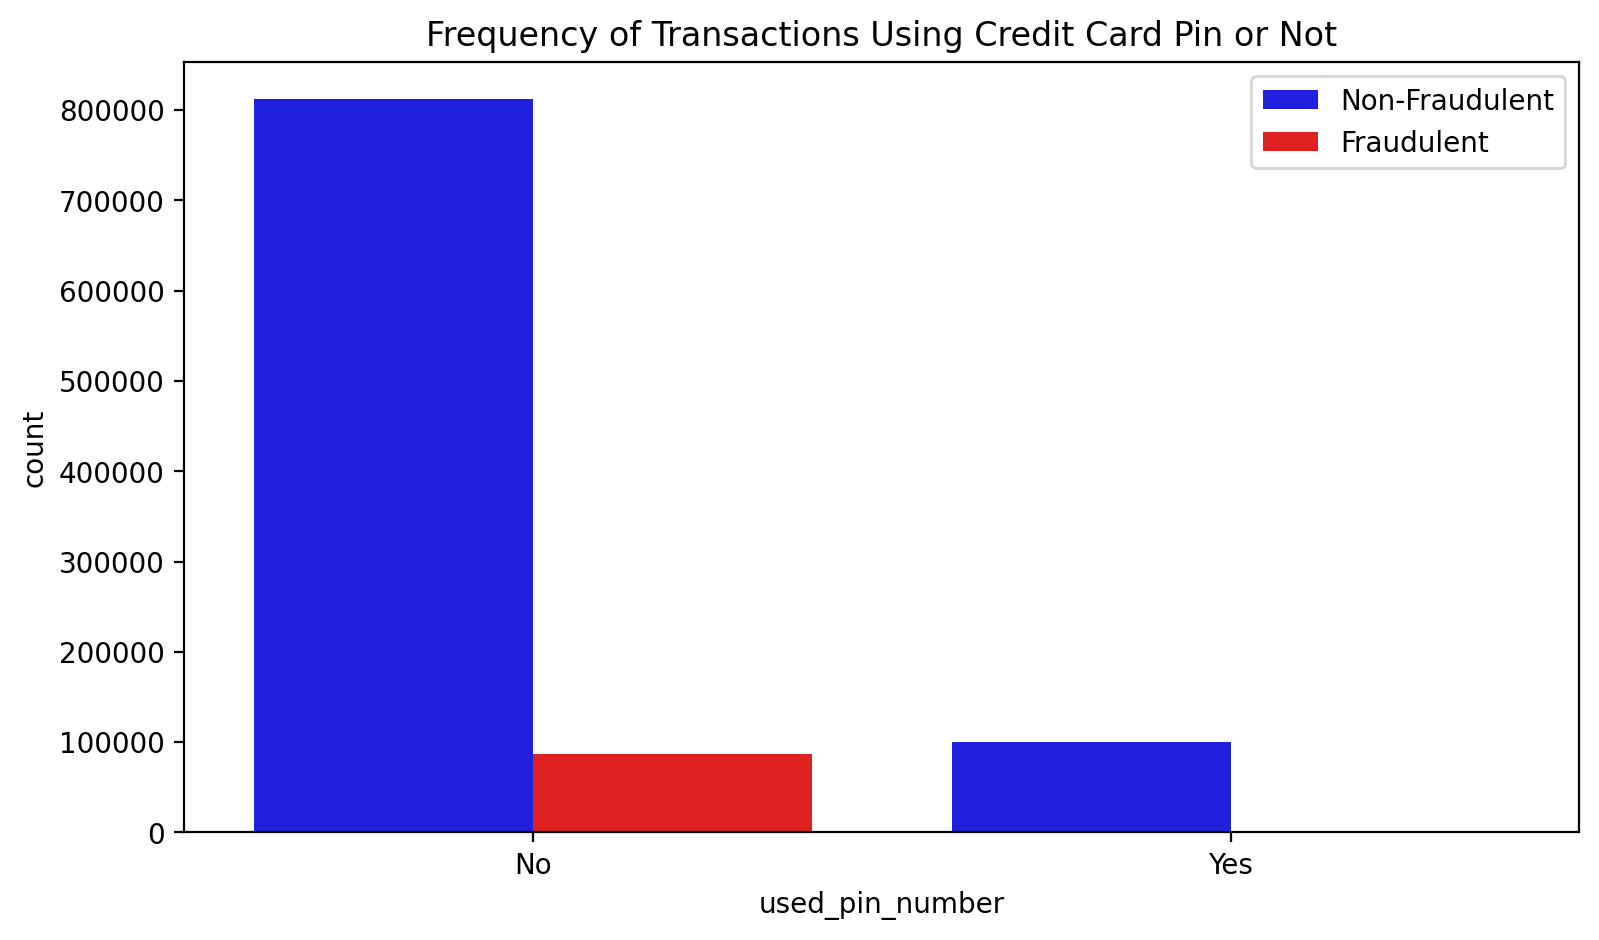

In [56]:
# Frequency of Transactions Using Credit Card Pin or Not
plt.figure(figsize=(9, 5), dpi=200)

# Creating a countplot to visualize the frequency of transactions
ax = sns.countplot(x='used_pin_number', hue='fraud', data=df, palette=['blue', 'red'])

# Setting the tick labels on the x-axis to 'No' and 'Yes'
ax.set_xticklabels(['No', 'Yes'])

# Adding a legend to the plot with labels for non-fraudulent and fraudulent transactions
ax.legend(labels=['Non-Fraudulent', 'Fraudulent'])

# Setting the title of the plot
plt.title('Frequency of Transactions Using Credit Card Pin or Not')

# Displaying the plot
plt.show()

**Comments**

This suggests that fraudsters are more likely to bypass the security measures provided by credit card pins when attempting fraudulent activities. It highlights the importance of using pins as an additional layer of protection to mitigate the risk of fraudulent transactions."

# Datasets Split

In [50]:
# Splitting the dataset into features (X) and labels (y)
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

# Splitting the data into training, testing, and validation sets
# with a test size of 20%, preserving class distribution using stratify
X_train_, X_test, y_train_, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Further splitting the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_, y_train_, test_size=0.2, random_state=42, stratify=y_train_)

# Scaling the features using StandardScaler
scaler = StandardScaler()

# Fitting the scaler on the training set and transforming the training set
X_train_scaled = scaler.fit_transform(X_train)

# Transforming the test set using the same fitted scaler
X_test_scaled = scaler.transform(X_test)

# Transforming the validation set using the same fitted scaler
X_val_scaled = scaler.transform(X_val)

# Handling Data Imbalance

## Undersampling Method

In [27]:
# Create an instance of the undersampler
undersampler = RandomUnderSampler(random_state=42)

# Undersample the training data
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_scaled, y_train)

## Oversampling Method

In [29]:
# Create an instance of the oversampler
oversampler = RandomOverSampler(random_state=42)

# Oversample the training data
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_scaled, y_train)

## Combination of Undersampling and Oversampling Method

In [46]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Define the undersampling and oversampling methods
undersampler = RandomUnderSampler()
oversampler = RandomOverSampler()

# Create a pipeline to combine undersampling and oversampling
pipeline = Pipeline([
    ('undersampling', undersampler),
    ('oversampling', oversampler)
])

# Apply the combined undersampling and oversampling to the training data
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train_scaled, y_train)

## Class Weight Method

In [ ]:
from sklearn.utils import class_weight

# Calculate class weights
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)

# Create a dictionary of class weights
class_weights_dict = dict(zip(np.unique(y_train), class_weights))

# Update the model with class weights
model.fit(X_train_scaled, y_train, class_weight=class_weights_dict)

## Treshold Tuning

In [ ]:
len(y_train)# Predict probabilities on the validation data
y_val_probabilities = model.predict_proba(X_val_scaled)

# Choose a threshold that balances precision and recall
threshold = 0.5

# Adjust predictions based on the threshold
y_val_pred = (y_val_probabilities[:, 1] >= threshold).astype(int)